In [ ]:
from google.colab import files

uploaded = files.upload()

Saving FUTIDX_BANKNIFTY_01-Mar-2020_TO_01-Jun-2020.csv to FUTIDX_BANKNIFTY_01-Mar-2020_TO_01-Jun-2020 (3).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded["FUTIDX_BANKNIFTY_01-Mar-2020_TO_01-Jun-2020 (3).csv"]))
df.head()

,Symbol,Date,Expiry,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Open Int,Change in OI,Underlying Value
0,BANKNIFTY,02-Mar-2020,28-May-2020,29718.95,29800.00,28820.00,29121.30,29119.3,29121.30,2020.0,11865.70,37940.0,35660.0,28868.40
1,BANKNIFTY,03-Mar-2020,28-May-2020,29319.95,29500.00,28990.25,29364.70,29479.0,29364.70,1477.0,8647.28,48020.0,10080.0,29177.05
2,BANKNIFTY,04-Mar-2020,28-May-2020,29354.75,29354.75,28374.25,28914.35,28950.7,28914.35,536.0,3095.86,49740.0,1720.0,28653.70
3,BANKNIFTY,05-Mar-2020,28-May-2020,29194.75,29369.00,28777.00,29018.65,28984.1,29018.65,330.0,1919.40,49700.0,-40.0,28815.35
4,BANKNIFTY,06-Mar-2020,28-May-2020,27924.35,28500.00,27505.70,27976.20,27960.0,27976.20,588.0,3277.28,53280.0,3580.0,27801.45


***The value of the underlying asset decreases since the data is from the period of the COVID pandemic. The Indian market was deteriorating and thus, the value of NIFTY50 decreased as time went.***

In [ ]:
df.columns

df1 = df[["Date  ", "Settle Price  ", "Underlying Value  "]]
df1 = df1.rename(columns={
    "Date  ": "Date",
    "Settle Price  ": "Settle Price",
    "Underlying Value  ": "Spot Price"
})
df1.head()

,Date,Settle Price,Spot Price
0,02-Mar-2020,29121.30,28868.40
1,03-Mar-2020,29364.70,29177.05
2,04-Mar-2020,28914.35,28653.70
3,05-Mar-2020,29018.65,28815.35
4,06-Mar-2020,27976.20,27801.45


In [ ]:
r = 4.40/100
expiry_date = pd.Timestamp("2020-05-28")

import numpy as np

df1["Date"] = pd.to_datetime(df1["Date"])

df1["t"] = (expiry_date - df1["Date"]).dt.days/365
df1["Model Price"] = df1["Spot Price"]*np.exp(r*df1["t"])

df1.head()

,Date,Settle Price,Spot Price,Model Price,t
0,2020-03-02,29121.30,28868.40,29172.755489,0.238356
1,2020-03-03,29364.70,29177.05,29481.105441,0.235616
2,2020-03-04,28914.35,28653.70,28948.811656,0.232877
3,2020-03-05,29018.65,28815.35,29108.617334,0.230137
4,2020-03-06,27976.20,27801.45,28081.013086,0.227397


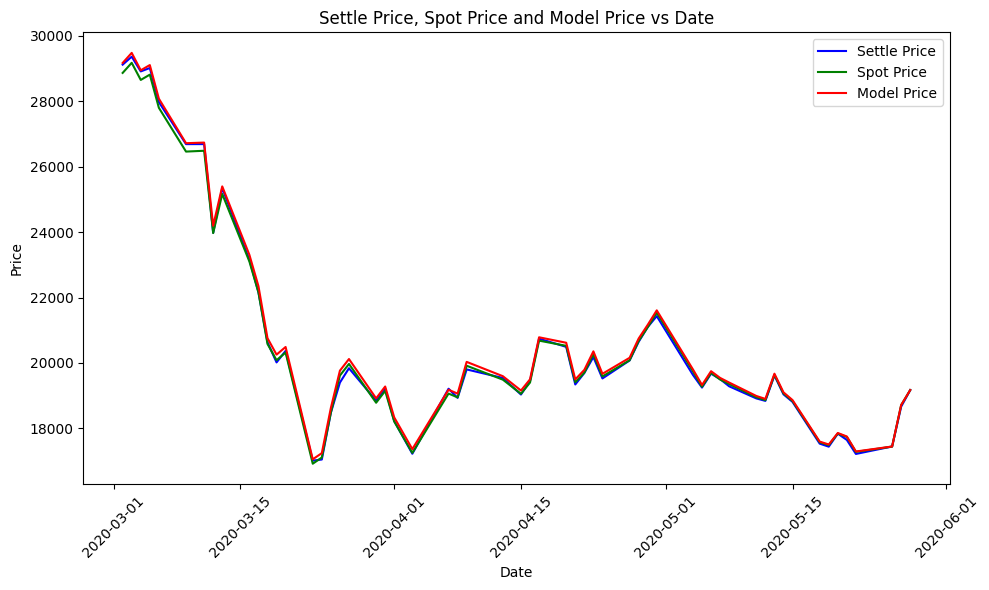

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df1["Date"], df1["Settle Price"], label="Settle Price", color="blue")
plt.plot(df1["Date"], df1["Spot Price"], label="Spot Price", color="green")
plt.plot(df1["Date"], df1["Model Price"], label="Model Price", color="red")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Settle Price, Spot Price and Model Price vs Date")

plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df1["Rate/%"] = np.log(df1["Settle Price"]/df1["Spot Price"])*100/df1["t"]
mean_rate = df1["Rate/%"].mean()
print(f"The mean Rate is {mean_rate} %, and is deviated by {(100*r - mean_rate)/r} %")

The mean Rate is -3.264917983309256 %, and is deviated by 174.20268143884672 %
